### 2D Grid
$x_{i} = x_{i} + i\Delta x$  
$y_{i} = y_{i} + i\Delta y$

## 2D Linear Convection

$$\frac {\partial u} {\partial t} + c\frac {\partial u} {\partial x} + c\frac {\partial u} {\partial y} = 0$$

## Discretize

$\frac{u^{n+1}_{i,j} - u^{n}_{i,j}} {\Delta t} + c\frac {u^{n}_{i,j} - u^{n}_{i-1,j}} {\Delta x} - c\frac {u^{n}_{i,j} - u^{n}_{i,j-1}} {\Delta y} = 0$

$u^{n+1}_{i,j} = u^{n}_{i,j} - c\frac {\Delta t} {\Delta x}(u^{n}_{i,j} - u^{n}_{i-1,j}) - c\frac {\Delta t} {\Delta x}(u^{n}_{i,j} - u^{n}_{i,j-1})$

### Initial condition 
$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

### boundary condition

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

In [2]:
from mpl_toolkits.mplot3d import Axes3D

import numpy
from matplotlib import pyplot, cm
%matplotlib inline

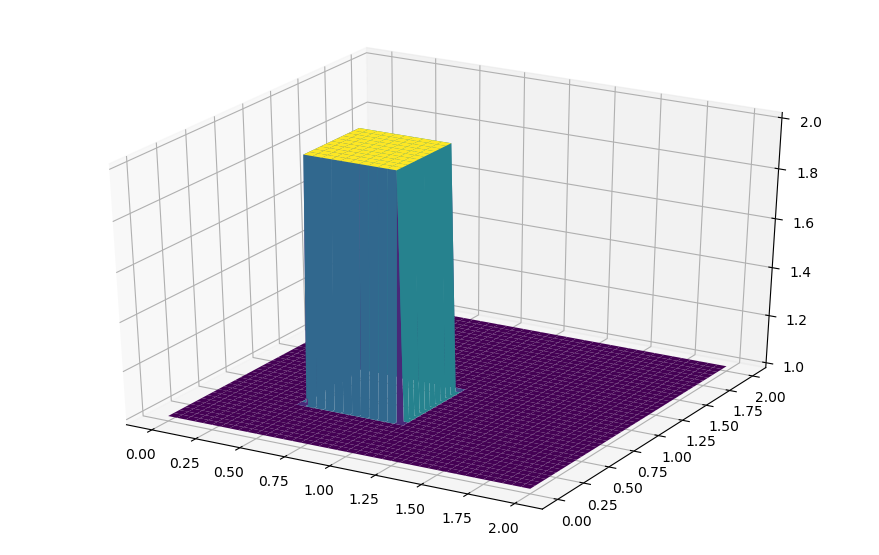

In [3]:
##variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
un = numpy.ones((ny, nx)) 

##Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

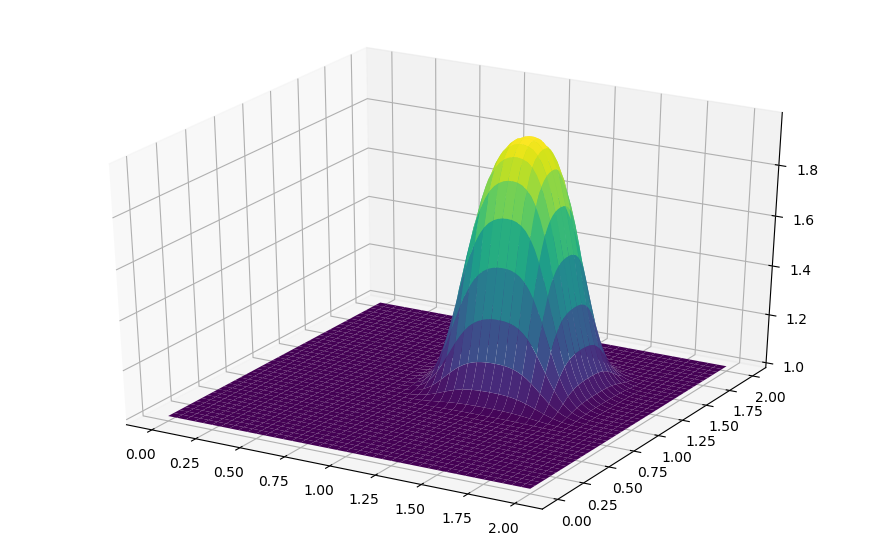

In [4]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

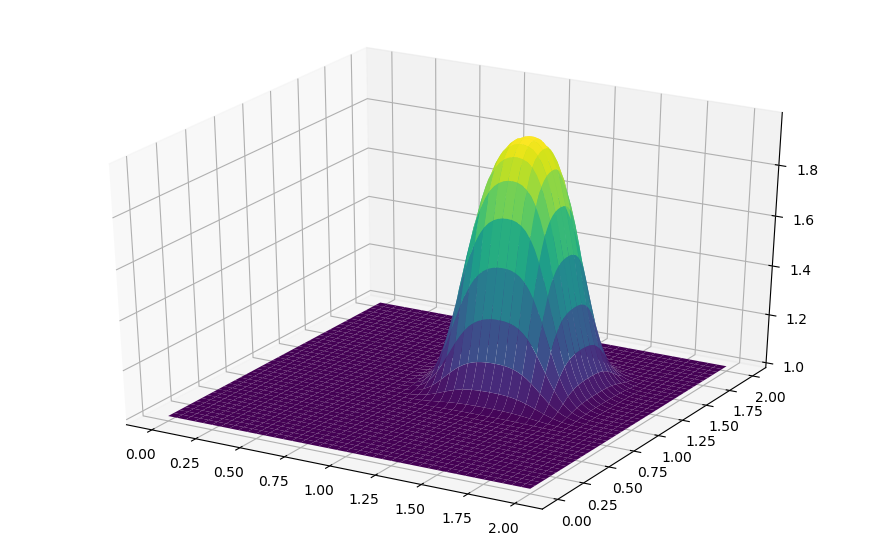

In [5]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)